## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/MyDrive/FYP/Implementation/data
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns_all.csv  UNSW-NB15_2.csv
OTset.csv		SVR-predict-data.csv	  UNSW-NB15_3.csv
preprocessing.csv	testset.csv		  UNSW-NB15_4.csv


In [3]:
attack_type = 'Backdoors'

## **Load balanced training datset for DOS attacks**

Data = (x_train, y_train)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col[attack_type])

#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df[attack_type] == 1]
Normal_Data = df[df['Label'] == 0]
frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[[attack_type]]
X.head()

undersample = RandomUnderSampler(random_state=0)
# fit and apply the transform
X, Y = undersample.fit_resample(X,Y)


x_train,y_train  = shuffle(X[columns],Y)


X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




array([[8.40132598e-04, 1.44850448e-04, 8.98072777e-04, ...,
        8.72346489e-01, 4.86987206e-01, 4.22383906e-02],
       [3.23179110e-05, 5.57205361e-06, 3.45467324e-05, ...,
        9.99986652e-01, 5.07056879e-03, 9.38333829e-04],
       [7.22370567e-04, 1.24546650e-04, 7.72189227e-04, ...,
        9.45251662e-01, 3.24767843e-01, 3.11864810e-02],
       ...,
       [2.40135205e-03, 4.14026215e-04, 2.56696253e-03, ...,
        9.88790102e-01, 1.39444029e-01, 4.67849623e-02],
       [0.00000000e+00, 4.13911240e-02, 0.00000000e+00, ...,
        0.00000000e+00, 4.13911240e-01, 0.00000000e+00],
       [1.32926080e-03, 2.29182896e-04, 1.42093395e-03, ...,
        9.97400830e-01, 7.05883319e-02, 4.17112871e-03]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [5]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=r'\s*,\s*', on_bad_lines='skip', index_col=False)

columns=list(select_col[attack_type])
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 

attacks = test_data[test_data['attack_cat'] == attack_type]
# print(DoS_attacks.shape)
Normal_Data = test_data[test_data['Label'] == 0]
# print(Normal_Data.shape)

frames = [attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=['attack_cat', 'Label'], axis=1)
Y=result[['Label']]
X.head()

x_test,y_test  = shuffle(X[columns],Y)

x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
if 'sport' in x_test:
    x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
if 'dsport' in x_test:
    x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
if 'srcip' in x_test:
    x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
if 'dstip' in x_test:
    x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
if 'proto' in x_test:
    x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
if 'state' in x_test:
    x_test['state'] = labelencoder.fit_transform(x_test['state'])

X_test_DoS_normalized = preprocessing.normalize(x_test) 


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


                       column_name  count_missing  To be dropped
dttl                          dttl              0          False
state                        state              0          False
sttl                          sttl              0          False
proto                        proto              0          False
swin                          swin              0          False
ct_dst_sport_ltm  ct_dst_sport_ltm              0          False
srcip                        srcip              0          False
dstip                        dstip              0          False
ct_dst_ltm              ct_dst_ltm              0          False
smeansz                    smeansz              0          False
ct_src_ ltm            ct_src_ ltm              0          False
ct_srv_src              ct_srv_src              0          False
Sload                        Sload              0          False
sbytes                      sbytes              0          False
dmeansz                  

**Normalization**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# df=pd.read_csv('filtered-data.csv')
# X=df.drop(labels=['Label'], axis=1)
# # X=df.drop(labels=['attack_cat','Label'], axis=1)
# # Y=df[['attack_cat','Label']]
# Y=df[['Label']]

# # split the dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 
# X_train_normalized = preprocessing.normalize(X_train)
# X_test_normalized = preprocessing.normalize(X_test)

array([[8.40132598e-04, 1.44850448e-04, 8.98072777e-04, ...,
        8.72346489e-01, 4.86987206e-01, 4.22383906e-02],
       [3.23179110e-05, 5.57205361e-06, 3.45467324e-05, ...,
        9.99986652e-01, 5.07056879e-03, 9.38333829e-04],
       [7.22370567e-04, 1.24546650e-04, 7.72189227e-04, ...,
        9.45251662e-01, 3.24767843e-01, 3.11864810e-02],
       ...,
       [2.40135205e-03, 4.14026215e-04, 2.56696253e-03, ...,
        9.88790102e-01, 1.39444029e-01, 4.67849623e-02],
       [0.00000000e+00, 4.13911240e-02, 0.00000000e+00, ...,
        0.00000000e+00, 4.13911240e-01, 0.00000000e+00],
       [1.32926080e-03, 2.29182896e-04, 1.42093395e-03, ...,
        9.97400830e-01, 7.05883319e-02, 4.17112871e-03]])

# K nearest neighbours

In [7]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
min = 99999999.999
bestK = -1
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    x = np.array(X_train_DoS_normalized)
    y = np.array(y_train)

    model.fit(x, y)  #fit the model
    pred=model.predict(X_test_DoS_normalized) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error, ',min = ',min,' bestk = ',bestK)
    if min > error:
        min = error
        bestK = K


RMSE value for k=  1 is: 0.13033364512781262 ,min =  99999999.999  bestk =  -1
RMSE value for k=  2 is: 0.12869503776932917 ,min =  0.13033364512781262  bestk =  1
RMSE value for k=  3 is: 0.12894509108625282 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  4 is: 0.13185214659360286 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  5 is: 0.1353006572221971 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  6 is: 0.13822205952983657 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  7 is: 0.14028948078063647 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  8 is: 0.1410268320719314 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  9 is: 0.14371208098687985 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  10 is: 0.14621432427045838 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  11 is: 0.14850787841960902 ,min =  0.12869503776932917  bestk =  2
RMSE value for k=  12 is: 0.15037539188035973 ,min =  0.128695037769329

**Finding best K - test set**

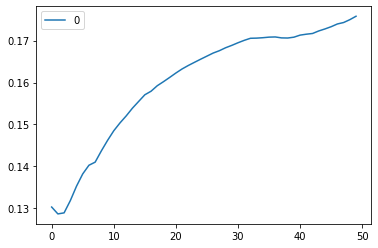

In [8]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [9]:
print('bestK = '+str(bestK))

bestK = 2


**Finding best K - train set**

In [10]:
# from sklearn import neighbors
# from sklearn.metrics import mean_squared_error 
# from math import sqrt
# import matplotlib.pyplot as plt
# %matplotlib inline

# rmse_val = [] #to store rmse values for different k
# for K in range(50):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)
#     x = np.array(X_train_DoS_normalized)
#     y = np.array(y_train)

#     model.fit(x, y)  #fit the model
#     pred=model.predict(x) #make prediction on test set
#     error = sqrt(mean_squared_error(y,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

In [11]:
# curve = pd.DataFrame(rmse_val) #elbow curve 
# curve.plot()

In [12]:
model = neighbors.KNeighborsRegressor(n_neighbors = bestK)
x = np.array(X_train_DoS_normalized)
y = np.array(y_train)
model.fit(x, y)
print(x.shape)
#predict on test set

x_test_array = np.array(X_test_DoS_normalized)
print(x_test_array.shape)
y_test_array = np.array(y_test)
y_pred_test_set = model.predict(x_test_array)

(2764, 15)
(444108, 15)


In [13]:
from sklearn.metrics import accuracy_score

for i in range(1,100):
  y_predict_class = [1 if p > i/100 else 0 for p in y_pred_test_set]
  print("Accuracy when threshould = ",i/100, round(accuracy_score(y_test_array, y_predict_class), 6))

Accuracy when threshould =  0.01 0.971599
Accuracy when threshould =  0.02 0.971599
Accuracy when threshould =  0.03 0.971599
Accuracy when threshould =  0.04 0.971599
Accuracy when threshould =  0.05 0.971599
Accuracy when threshould =  0.06 0.971599
Accuracy when threshould =  0.07 0.971599
Accuracy when threshould =  0.08 0.971599
Accuracy when threshould =  0.09 0.971599
Accuracy when threshould =  0.1 0.971599
Accuracy when threshould =  0.11 0.971599
Accuracy when threshould =  0.12 0.971599
Accuracy when threshould =  0.13 0.971599
Accuracy when threshould =  0.14 0.971599
Accuracy when threshould =  0.15 0.971599
Accuracy when threshould =  0.16 0.971599
Accuracy when threshould =  0.17 0.971599
Accuracy when threshould =  0.18 0.971599
Accuracy when threshould =  0.19 0.971599
Accuracy when threshould =  0.2 0.971599
Accuracy when threshould =  0.21 0.971599
Accuracy when threshould =  0.22 0.971599
Accuracy when threshould =  0.23 0.971599
Accuracy when threshould =  0.24 0.9

In [14]:
count =0
for i in y_pred_test_set:
  if i == 1:
    count += 1
count

6047

**confusion matrix**

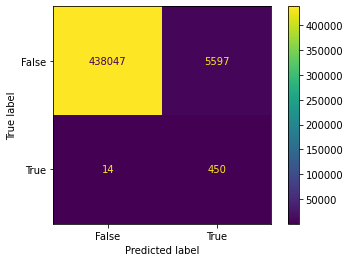

Accuracy when threshould =  0.99 0.987366


In [15]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

threshould =0.99

y_predict_class = [1 if p > threshould else 0 for p in y_pred_test_set]
confusion_matrix = metrics.confusion_matrix(y_test_array, y_predict_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 


print("Accuracy when threshould = ",threshould, round(accuracy_score(y_test_array, y_predict_class), 6))

In [16]:
# import matplotlib.pyplot as plt
# import numpy
# from sklearn import metrics

# threshould =1

# y_predict_class = [1 if p >= threshould else 0 for p in y_pred_test_set]
# confusion_matrix = metrics.confusion_matrix(y_test_array, y_predict_class)

# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show() 


# print("Accuracy when threshould = ",threshould, round(accuracy_score(y_test_array, y_predict_class), 6))